In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op


In [6]:
filename = 'ex1data1.txt'
data = np.loadtxt(filename, delimiter=',')#b=np.linalg.inv(a)
data

array([[  6.1101 ,  17.592  ],
       [  5.5277 ,   9.1302 ],
       [  8.5186 ,  13.662  ],
       [  7.0032 ,  11.854  ],
       [  5.8598 ,   6.8233 ],
       [  8.3829 ,  11.886  ],
       [  7.4764 ,   4.3483 ],
       [  8.5781 ,  12.     ],
       [  6.4862 ,   6.5987 ],
       [  5.0546 ,   3.8166 ],
       [  5.7107 ,   3.2522 ],
       [ 14.164  ,  15.505  ],
       [  5.734  ,   3.1551 ],
       [  8.4084 ,   7.2258 ],
       [  5.6407 ,   0.71618],
       [  5.3794 ,   3.5129 ],
       [  6.3654 ,   5.3048 ],
       [  5.1301 ,   0.56077],
       [  6.4296 ,   3.6518 ],
       [  7.0708 ,   5.3893 ],
       [  6.1891 ,   3.1386 ],
       [ 20.27   ,  21.767  ],
       [  5.4901 ,   4.263  ],
       [  6.3261 ,   5.1875 ],
       [  5.5649 ,   3.0825 ],
       [ 18.945  ,  22.638  ],
       [ 12.828  ,  13.501  ],
       [ 10.957  ,   7.0467 ],
       [ 13.176  ,  14.692  ],
       [ 22.203  ,  24.147  ],
       [  5.2524 ,  -1.22   ],
       [  6.5894 ,   5.9966 ],
       [

In [11]:
X_no1 = data[:,0:1]
y = data[:, 1:]
X = np.c_[np.ones(X_no1.shape[0]), X_no1]

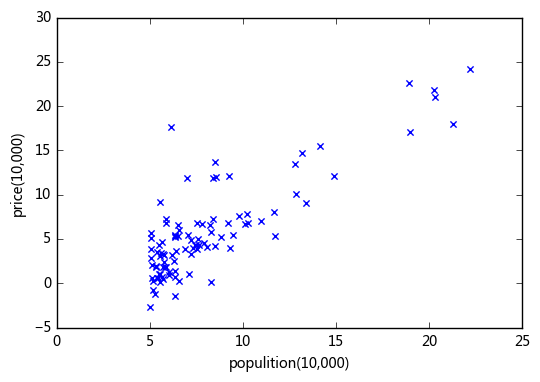

In [16]:
#plt data
ax = plt.subplot(111)
ax.scatter(X_no1, y, marker = 'x')
plt.xlabel('populition(10,000)')
plt.ylabel('price(10,000)')
plt.show()

In [21]:
theta = np.zeros((X.shape[1], 1))

In [23]:
def costfunction(theta, X, y):
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m)*(h-y).T.dot(h-y)
    return J

In [24]:
costfunction(theta, X, y)


array([[ 32.07273388]])

In [36]:
def gradientdescent(theta, X, y,alpha, iter_nums ):
    i = 0
    m = len(y)
    cost_hist = []
    while i<iter_nums:
        h = X.dot(theta)
        theta = theta - alpha*1/m * X.T.dot(h-y)
        cost = costfunction(theta, X, y)[0, 0]
        cost_hist.append(cost)
        i += 1
    return cost_hist, theta

In [39]:
out = gradientdescent(theta, X, y, 0.01, 1500)
cost = out[0]
theta_optim = out[1]
print(theta_optim)#fprintf(' -3.6303\n  1.1664\n\n')

[[-3.63029144]
 [ 1.16636235]]


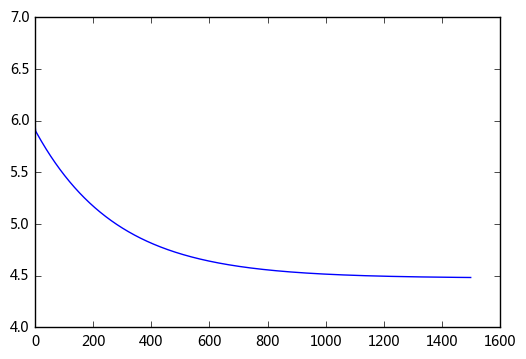

In [43]:
plt.plot(cost)
plt.show()

In [40]:
predict = np.array([[1, 3.5]]).dot(theta_optim)
print(predict)

[[ 0.45197679]]


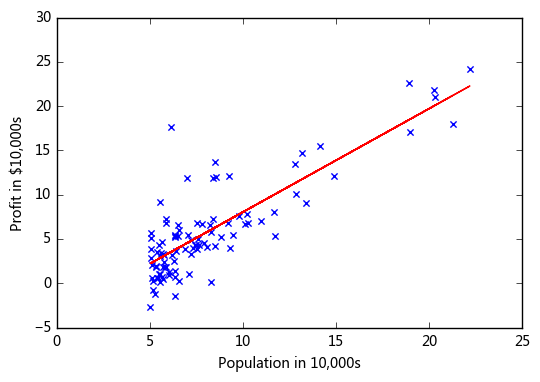

In [42]:
ax = plt.subplot(111)
ax.scatter(data[:,0:1], data[:,1:], marker='x', )
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population in 10,000s')
ax.plot(X[:,1:],X.dot(theta_optim),'r') 
plt.show()

In [46]:

u = np.linspace(-10, 10, 100)
v = np.linspace(-1, 4, 100)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        theta = np.array([[u[i]], [v[j]]])
        z[i, j] = costfunction(theta, X, y)[0]
z = z.T


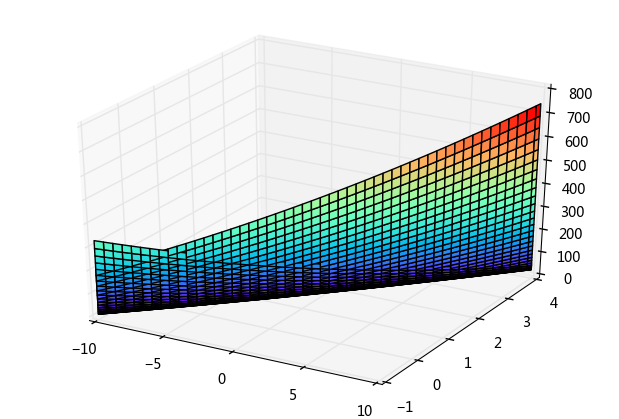

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = Axes3D(fig)
ax1.plot_surface(u, v, z, rstride=3, cstride=2, cmap='rainbow')

plt.show()

C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


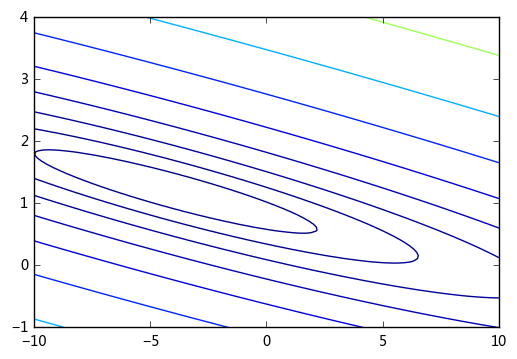

In [467]:
plt.contour(u, v, z, np.logspace(-2, 3, 20))

plt.show()